# An introduction to Reinforcement Learning
> Demo and Discussion of RL & OpenAI gym

In [2]:
#collapse-hide
%matplotlib inline
import PIL
import gym
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
import matplotlib.pyplot as plt
mpl.rc('animation', html='jshtml')
# Imports specifically so we can render outputs in Jupyter.
#from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
import tensorflow as tf
import pandas as pd
from tensorflow import keras

## What is RL?

- In a nutshell, RL is the study of agents and how they learn by trial and error. 
- It formalizes the idea that rewarding or punishing an agent for its behavior makes it more likely to repeat or forego that behavior in the future.

This is quite a broad setting, which can apply to a wide variety of tasks.  

<img src="my_icons/RL_applications.JPG" width=700 height=700 left   align="left"/>

1. The agent can be the program controlling a robot. In this case, the environment is the real world, the agent observes the environment through a  
set of sensors such as cameras and touch sensors, and its actions consist of sending signals to activate motors.  
1. The agent can be the program controlling Ms. Pac-Man. In this case, the environment is a simulation of the Atari game.

1. The agent can be the program playing a board game such as Go.

1. The agent does not have to control a physically (or virtually) moving thing. A smart thermostat, getting positive rewards whenever  
   it is close to the target temperature and saves energy, and negative rewards when humans need to tweak the temperature.

1. The agent can observe stock market prices and decide how much to buy
or sell every second. Rewards are obviously the monetary gains and
losses.

## RL framework

<img src="my_icons/RL_framework.JPG" width=700 height=700 left   align="left"/>

**Key Concepts and Terminology**:  

1. The main characters of RL are the agent and the environment:<br>
   - The agent is an entity which is of interest to us.
   - The environment is the world that the agent lives in and interacts with. At every step of interaction, the agent sees a (possibly partial) observation of the state of the environment, and then decides on an action to take.  
   - The environment changes when the agent acts on it, but may also change on its own  
  

2. - The agent also perceives a reward signal from the environment, a number that tells it how good or bad the current world state is.  
   - The goal of the agent is to maximize its cumulative reward, called return. Reinforcement learning methods are ways that the agent can learn behaviors to achieve its goal.


> To talk more specifically what RL does, we need to introduce additional terminology. We need to talk about states and observations,
action spaces,
policies,
return,
and value functions.

### States and Observations<br>
- A state '**s**' is a complete description of the state of the world.
There is no information about the world which is hidden from the state.  
- An observation o is a partial description of a state, which may omit information. 
A lot of the times, observations and state are used interchangeably

- In deep RL, we almost always represent states and observations by a real-valued vector, matrix, or higher-order tensor
For instance, a visual observation could be represented by the RGB matrix of its pixel values;   
the state of a robot might be represented by its joint angles and velocities


### Action Spaces <br>
- Different environments allow different kinds of actions  
- The set of all valid actions in a given environment is often called the action space. Some environments, like Atari and Go, have discrete action spaces, where only a finite number of moves are available to the agent  
Other environments, like where the agent controls a robot in a physical world, have continuous action spaces

## Policies

- The algorithm a software agent uses to determine its actions is called its policy. It can be deterministic or stochastic denoted by $\Pi$
- Because the policy is essentially the agent’s brain, it’s not uncommon to substitute the word “policy” for “agent”, eg saying “The policy is trying to maximize reward.”
- In deep RL, we deal with parameterized policies i.e policies whose outputs are computable functions that depend on a set of parameters (eg the weights and biases of a neural network) which we can adjust to change the behavior via some optimization algorithm  

<img src="RL_agent.JPG" width=800 height=800 left   align="left"/>

### Policy design<br>

- Techniques to design a policy:

      For example, consider a robotic vacuum cleaner whose reward is
      the amount of dust it picks up in 30 minutes. 
      Its policy could be to move forward with some probability p every second,
      or randomly rotate left or right with probability 1 – p. 
      The rotation angle would be a random angle between –r and +r.
      
      How would you train such a robot?
      There are just two policy parameters you can tweak: the probability p and the angle range r.

<img src="RL_vaccum_robot.JPG" width=700 height=700 left   align="left"/>.<br>

Four points in policy space (left) and the agent’s corresponding behavior (right)

- One possible learning algorithm could be to try out many different values for these parameters, and pick the
combination that performs best (see above Figure).  
This is an example of ***policy search using a brute force approach***. When the policy space is too
large (which is generally the case), finding a good set of parameters  
this way is like searching for a needle in a gigantic haystack.
- Another way to explore the policy space is to use genetic algorithms. For example, you could randomly create a first generation of 100 policies and try them out,  
then “kill” the 80 worst policies and make the 20 survivors produce 4 offspring each.  
An offspring is a copy of its parent plus some random variation. The surviving policies plus their offspring together constitute the second generation.  
we can continue to iterate through generations this way until we find a good policy.
- Yet another approach is to use optimization techniques, by evaluating the
gradients of the rewards with regard to the policy parameters,  
then tweaking these parameters by following the gradients toward higher rewards.  
This approach, is called **policy gradients (PG)** .  
Going back to the vacuum cleaner robot, you could slightly increase p and evaluate whether doing so increases the amount of dust picked up by the robot in 30 minutes;  
if it does, then increase p some more, or else reduce p.

# OpenAI Gym

>OpenAI Gym is a toolkit that provides a wide variety of simulated
environments(Atari games, board games, 2D and 3D physical simulations etc.) so you can train agents, compare them, or develop new RL algorithms.<br>  
>One of the challenges of Reinforcement Learning is that in order to train an
agent, you first need to have a working environment.
If you want to program an agent that will learn to play an Atari game, you will need an Atari game
simulator. If you want to program a walking robot, then the environment is the
real world, and you can directly train your robot in that environment, but this has
its limits: if the robot falls off a cliff, you can’t just click Undo. 
You can’t speed up time either; 
And it’s generally too expensive to train 1,000 robots in parallel.   
In short, training is hard and slow in the real world, so you generally need a simulated environment.  

In [3]:
df = pd.DataFrame({"OpenAI_Environments": [i.id for i in list(gym.envs.registry.all())[:50]]}).sample(10)
(df.style
        .set_table_styles([{'selector': 'th', 'props': [('font-size', '20pt')]}])
        .set_properties(**{'font-size': '20pt'})
)

,OpenAI_Environments
46,HumanoidStandup-v2
1,RepeatCopy-v0
11,Acrobot-v1
23,NChain-v0
35,HalfCheetah-v3
39,Swimmer-v3
3,ReversedAddition3-v0
10,Pendulum-v0
33,InvertedDoublePendulum-v2
26,GuessingGame-v0


## The Cart Pole/Inverted pendulum problem<br>

The Cart-Pole is a classic control problem. It is a very simple environment composed of a cart that can move left or right, and pole placed vertically on top of it.   
The agent must move the cart left or right to keep the pole upright.<br>  

<img src="Cartpole.JPG" width=700 height=700 left   align="left"/>

Observations vary depending on the environment. In this case it is a 1D NumPy array composed of 4 floats:   
they represent the cart’s horizontal position (0.0 = center), its velocity (positive means right), the angle of the pole, and its angular velocity
(positive means clockwise) respectively.

In [2]:
env = gym.make("CartPole-v1")
env.seed(42)
obs = env.reset()
obs

array([-0.01258566, -0.00156614,  0.04207708, -0.00180545])

An environment can be visualized by calling its render() method, and you can pick the rendering mode (the rendering options depend on the environment)
In this example we will set mode="rgb_array" to get an image of the environment as a NumPy array.

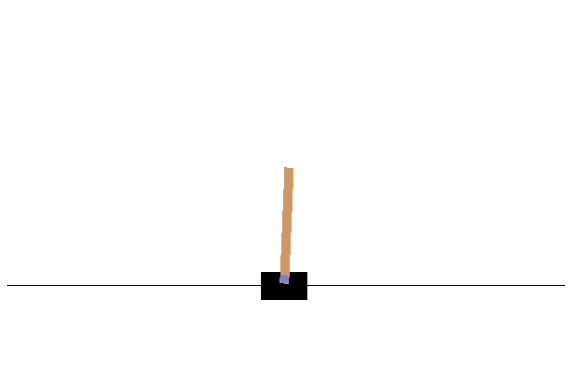

In [3]:
def plot_environment(env, figsize=(10,8)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

In [8]:
# actions possible
env.action_space

Discrete(2)

There are 2 possible actions, accelerate towards the left or towards the right denoted by integers 0 and 1 respectively.
Other environments may have additional discrete actions, or other kinds of actions (e.g., continuous).  
Since the pole is leaning toward the right (obs[2] > 0), let’s accelerate the cart toward the
right using the `step()` method.

In [24]:
action = 1 #accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.01261699,  0.19292789,  0.04204097, -0.28092127])

Notice that the cart is now moving toward the right (obs[1] > 0). The pole is still tilted toward the right (obs[2] > 0), but its angular velocity is now negative (obs[3] < 0), so it will likely be tilted toward the left after the next step

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

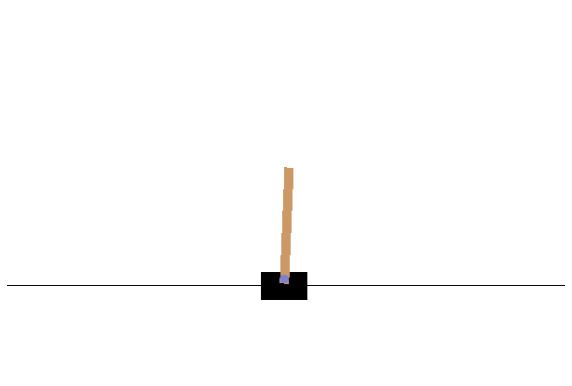

In [5]:
plot_environment(env)

- The environment also tells the agent how much reward it got during the last step. In this environment, you get a reward of 1.0 at every step, no matter what
you do, so the goal is to keep the episode running as long as possible.
- The sequence of steps between the moment the environment is reset(initialised) until it is done is called an "episode".  
When the episode is over, the environment returns `done=True`.  
This will happen when the pole tilts too much, or goes off the screen, or after 200 steps (in this last case,
you have won). After that, the environment must be reset before it can be used again by using `obs = env.reset()`
- Finally, info is an environment-specific dictionary that can provide some extra information that you may find useful for debugging or for training.  
For example, in some games it may indicate how many lives the agent has.

In [8]:
reward, done, info

(1.0, False, {})

> Now how can we make the poll remain upright? 

Let’s hardcode a simple policy that accelerates left when the pole is leaning
toward the left and accelerates right when the pole is leaning toward the right.  
We will run this policy to see the average rewards it gets over 500 episodes:

In [12]:
env.seed(42)
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        print(step, action, reward, episode_rewards,'\n')
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 0 1.0 33.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 0 1.0 15.0 

16 0

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 1 1.0 52.0 

53 1 1.0 53.0 

54 1 1.0 54.0 

55 1 1.0 55.0 

56 1 1.0 56.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 1 1.0 49.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1

47 1 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

53 0 1.0 53.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 1 1.0 52.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 1 1.0 52.0 


20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0

0 0 1.0 0 

1 0 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0


37 0 1.0 37.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

53 0 1.0 53.0 

54 0 1.0 54.0 

55 0 1.0 55.0 

56 0 1.0 56.0 

57 1 1.0 57.0 

58 1 1.0 58.0 

59 1 1.0 59.0 

60 1 1.0 60.0 

61 1 1.0 61.0 

0 0 1.0 0 

1

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

51 1 1.0 51.0 

52 0 1.0 52.0 

53 0 1.0 53.0 

54 0 1.0 54.0 

55 0 1.0 55.0 

56 0 1.0 56.0 

57 0 1.0 57.0 

58 0 1.0 58.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 0 1.0 50.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 1

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 




37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 1 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 0 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

52 0 1.0 52.0

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 1 1.0 2.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 0 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 

3 1 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 0 1.0 8.0 

9 0 1.0 9.0 

10 0 1.0 10.0 

11 0 1.0 11.0 

12 0 1.0 12.0 

13 0 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 1 1.0 18.0 

19 1 1.0 19.0 

20 1 1.0 20.0 

21 1 1.0 21.0 

22 1 1.0 22.0 

23 1 1.0 23.0 

24 1 1.0 24.0 

25 1 1.0 25.0 

26 1 1.0 26.0 

27 1 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 0 1.0 32.0 

33 0 1.0 33.0 

34 0 1.0 34.0 

35 0 1.0 35.0 

36 0 1.0 36.0 

37 0 1.0 37.0 

38 0 1.0 38.0 

39 0 1.0 39.0 

40 0 1.0 40.0 

41 0 1.0 41.0 

42 0 1.0 42.0 

43 0 1.0 43.0 

44 0 1.0 44.0 

45 0 1.0 45.0 

46 1 1.0 46.0 

47 1 1.0 47.0 

48 1 1.0 48.0 

49 1 1.0 49.0 

50 1 1.0 50.0 

0 0 1.0 0 

1 0 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 1 1.0 4.0 

5 1 1.0 5.0 

6 1 1.0 6.0 

7 1 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 0 1.0 14.0 

15 0 1.0 15.0 

16 0 1.0 16.

27 0 1.0 27.0 

28 1 1.0 28.0 

29 1 1.0 29.0 

30 1 1.0 30.0 

31 1 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

39 1 1.0 39.0 

40 1 1.0 40.0 

41 1 1.0 41.0 

42 1 1.0 42.0 

43 1 1.0 43.0 

44 1 1.0 44.0 

45 1 1.0 45.0 

46 1 1.0 46.0 

47 0 1.0 47.0 

48 0 1.0 48.0 

49 0 1.0 49.0 

50 0 1.0 50.0 

51 0 1.0 51.0 

0 1 1.0 0 

1 1 1.0 1.0 

2 0 1.0 2.0 

3 0 1.0 3.0 

4 0 1.0 4.0 

5 0 1.0 5.0 

6 0 1.0 6.0 

7 0 1.0 7.0 

8 1 1.0 8.0 

9 1 1.0 9.0 

10 1 1.0 10.0 

11 1 1.0 11.0 

12 1 1.0 12.0 

13 1 1.0 13.0 

14 1 1.0 14.0 

15 1 1.0 15.0 

16 1 1.0 16.0 

17 1 1.0 17.0 

18 0 1.0 18.0 

19 0 1.0 19.0 

20 0 1.0 20.0 

21 0 1.0 21.0 

22 0 1.0 22.0 

23 0 1.0 23.0 

24 0 1.0 24.0 

25 0 1.0 25.0 

26 0 1.0 26.0 

27 0 1.0 27.0 

28 0 1.0 28.0 

29 0 1.0 29.0 

30 0 1.0 30.0 

31 0 1.0 31.0 

32 1 1.0 32.0 

33 1 1.0 33.0 

34 1 1.0 34.0 

35 1 1.0 35.0 

36 1 1.0 36.0 

37 1 1.0 37.0 

38 1 1.0 38.0 

In [14]:
totals

[25.0,
 34.0,
 31.0,
 42.0,
 39.0,
 56.0,
 49.0,
 39.0,
 39.0,
 38.0,
 37.0,
 41.0,
 38.0,
 40.0,
 49.0,
 39.0,
 24.0,
 36.0,
 35.0,
 37.0,
 42.0,
 45.0,
 34.0,
 51.0,
 40.0,
 38.0,
 39.0,
 51.0,
 31.0,
 53.0,
 60.0,
 39.0,
 42.0,
 40.0,
 52.0,
 37.0,
 41.0,
 25.0,
 37.0,
 26.0,
 25.0,
 48.0,
 46.0,
 50.0,
 47.0,
 40.0,
 34.0,
 26.0,
 41.0,
 51.0,
 46.0,
 39.0,
 52.0,
 39.0,
 45.0,
 50.0,
 38.0,
 68.0,
 46.0,
 47.0,
 35.0,
 36.0,
 35.0,
 40.0,
 52.0,
 54.0,
 39.0,
 39.0,
 36.0,
 25.0,
 45.0,
 57.0,
 49.0,
 47.0,
 39.0,
 37.0,
 49.0,
 51.0,
 39.0,
 31.0,
 25.0,
 52.0,
 47.0,
 39.0,
 34.0,
 35.0,
 46.0,
 34.0,
 49.0,
 47.0,
 54.0,
 47.0,
 45.0,
 45.0,
 56.0,
 25.0,
 41.0,
 48.0,
 39.0,
 39.0,
 51.0,
 33.0,
 39.0,
 26.0,
 40.0,
 25.0,
 39.0,
 49.0,
 36.0,
 34.0,
 38.0,
 36.0,
 55.0,
 31.0,
 26.0,
 52.0,
 61.0,
 40.0,
 37.0,
 25.0,
 57.0,
 56.0,
 45.0,
 36.0,
 64.0,
 51.0,
 45.0,
 46.0,
 41.0,
 48.0,
 52.0,
 41.0,
 44.0,
 32.0,
 35.0,
 49.0,
 40.0,
 39.0,
 25.0,
 38.0,
 45.0,
 35.0,
 39.0,

In [13]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(41.684, 8.839917646675222, 24.0, 68.0)

Even with 500 tries, this policy never managed to keep the pole upright for more
than 68 consecutive steps.  
This environment is considered solved when the agent keeps the poll up for 200 steps.  
Let's visualise one episode.    

In [15]:
env.seed(42)
frames = []
obs = env.reset()

for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = basic_policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [53]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure(figsize=(10,8))
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [19]:
plot_animation(frames)

Clearly the system is unstable and after just a few wobbles, the pole ends up too tilted: **game over**

## Neural Network Policies

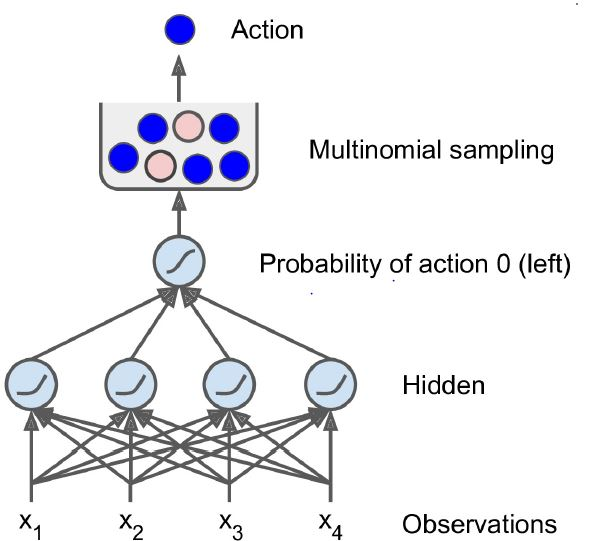

Let's design the same policy but using a neural network. It will take observations as inputs, and output the action to be executed. 
To choose an action, the network will estimate a probability for each action, then we will select an action randomly according to the estimated probabilities.  
In the case of the Cart-Pole environment, there are just two possible actions (left or right), so we only need one output neuron: it will output the probability p of the action 0 (left), and  the probability of action 1 (right) will be 1 - p.

In [25]:
np.random.seed(42)
tf.random.set_seed(42)
n_inputs = 4 # == env.observation_space.shape[0]
model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

## Evaluating Actions: The Credit Assignment Problem<br>

To train this neural network we will need to define the target probabilities y. If an action is good we should increase its probability, and conversely if it is bad we should reduce it. It would just be regular supervised learning.  
***But how do we know whether an action is good or bad?*** 
The problem is that in Reinforcement Learning the only guidance the agent gets is through rewards, and rewards are typically ***sparse and delayed***.  

For example, if the agent manages to balance the pole for 100 steps,
how can it know which of the 100 actions it took were good, and which of them
were bad? All it knows is that the pole fell after the last action, but surely this
last action is not entirely responsible. This is called the **credit assignment
problem**: when the agent gets a reward, it is hard for it to know which actions
should get credited (or blamed) for it.

To tackle this problem, a common strategy is to evaluate an action based on the
sum of all the rewards that come after it, usually applying a discount factor γ
(gamma) at each step. This sum of discounted rewards is called the action’s
return.

If the discount factor is close to 0, then future rewards won’t count for much compared
to immediate rewards. Conversely, if the discount factor is close to 1, then
rewards far into the future will count almost as much as immediate rewards.
Typical discount factors vary from 0.9 to 0.99.
In the CartPole environment, actions have fairly short-term effects, so choosing a
discount factor of 0.95 seems reasonable.

A good action may be followed by several bad actions that cause the
pole to fall quickly, resulting in the good action getting a low return. However, if we play the
game enough times, on average good actions will get a higher return than bad
ones.
We want to estimate how much better or worse an action is, compared to
the other possible actions, on average. This is called the action advantage. For
this, we must run many episodes and normalize all the action returns (by
subtracting the mean and dividing by the standard deviation). After that, we can
reasonably assume that actions with a negative advantage were bad while actions
with a positive advantage were good.

## Policy Gradients<br>

PG algorithms optimise the parameters of a policy by first playing multiple episodes, then making the actions in good episodes slightly more likely(by following the gradients toward higher rewards), while actions in bad episodes are made slightly less likely. First we play, then we go back and think about what we did.

We will be using one popular class of PG algorithms, called ***REINFORCE*** algorithms, where we:

             1. First, let the neural network policy play the game several times, and at
             each step, compute the gradients but don’t apply these gradients yet.
             2. Once you have run several episodes, compute each action’s advantage.
             3. If an action’s advantage is positive, it means that the action was
             probably good, and you want to apply the gradients computed earlier to
             make the action even more likely to be chosen in the future. 
             However, if the action’s advantage is negative, it means the action was probably
             bad, and you want to apply the opposite gradients to make this action
             slightly less likely in the future. The solution is simply to multiply each
             gradient vector by the corresponding action’s advantage.
             4. Finally, compute the mean of all the resulting gradient vectors, and use
             it to perform a Gradient Descent step.

Let's start by creating a function to play a single step using the model. We will also pretend for now that whatever action it takes is the right one, so we can compute the loss and its gradients (we will just save these gradients for now, and modify them later depending on how good or bad the action turned out to be)

In [74]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba) #shape of [1,1]
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy())) # slicing the tensor and converting to int using np
    return obs, reward, done, grads

- We start by calling the model, giving it a single observation (we reshape the observation so
it becomes a batch containing a single instance, as the model expects a
batch). This outputs the probability of going left.    
- Next, we sample a random float between 0 and 1, and we check whether it is greater than left_proba. If left_proba is high, 
then action will most likely be False i.e 0, so y_target(probability) would be equal to 1 - 0 = 1. 
- In other words, we set the target to 1, meaning we pretend that the probability of going left should have been 100% (so we took the right action).  
If the action is 0 (left), then the target probability of going left will be 1. If the action is 1 (right), then the target
probability will be 0.  
- Then we compute the loss compute the gradient of the loss with regard to the model’s
trainable variables without stepping them.
- Finally, we play the selected action, and we return the new observation,
the reward, whether the episode is ended or not, and the
gradients that we just computed.

In [75]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

This code returns a list of reward lists (one reward list per episode, containing
one reward per step), as well as a list of gradient lists (one gradient list per
episode, each containing one tuple of gradients per step and each tuple
containing one gradient tensor per trainable variable).

The Policy Gradients algorithm uses the model to play the episode several times (e.g., 10 times), then it goes back and looks at all the rewards, discounts them and normalizes them. So let's create couple functions for that: the first will compute discounted rewards; the second will normalize the discounted rewards across many episodes.

In [76]:
def discount_rewards(rewards, discount_factor):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_factor
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
    all_discounted_rewards = [discount_rewards(rewards, discount_factor) 
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

Say there were 3 actions, and after each action there was a reward: first 10, then 0, then -50. If we use a discount factor of 80%, then the 3rd action will get -50 (full credit for the last reward), but the 2nd action will only get -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10), which leads to a discounted reward of -22.

In [55]:
discount_rewards([10,0,-50], discount_factor=0.8)

array([-22, -40, -50])

To normalize all discounted rewards across all episodes, we compute the mean and standard deviation of all the discounted rewards,
and we subtract the mean from each discounted reward, and divide by the standard deviation.
Notice that the first episode was much worse than the second, so its normalized
advantages are all negative; all actions from the first episode would be
considered bad, and conversely all actions from the second episode would be
considered good.  

In [58]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

We will run 150 training iterations(epochs), playing 10 episodes per iteration, and each
episode will last at most 200 steps. 
We will use a discount factor of 0.95, Adam optimizer with learning rate 0.01 and we will use the binary cross-entropy loss
function because we are training a binary classifier (there are two possible
actions: left or right)

In [77]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95
optimizer = keras.optimizers.Adam(lr=0.01)
loss_fn = keras.losses.binary_crossentropy

In [78]:
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1")
    env.seed(seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

In [43]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

# model = keras.models.Sequential([
#     keras.layers.Dense(5, activation="elu", input_shape=[4]),
#     keras.layers.Dense(1, activation="sigmoid"),
# ])

In [79]:
# env = gym.make("CartPole-v1")
# env.seed(42);
for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                    
    print("\rIteration: {}, mean rewards: {:.1f}".format(          
        iteration, total_rewards / n_episodes_per_update), end="")
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_factor)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

Iteration: 149, mean rewards: 195.8

In [80]:
frames = render_policy_net(model)
plot_animation(frames)

- At each training iteration, this loop calls the
play_multiple_episodes() function, which plays the game 10 times
and returns all the rewards and gradients for every episode and step

- Then we call the discount_and_normalize_rewards() to compute
each action’s normalized advantage (which in the code we call the
final_reward). This provides a measure of how good or bad each
action actually was
- Next, we go through each trainable variable, and for each of them we
compute the weighted mean of the gradients for that variable over all
episodes and all steps, weighted by the final_reward
Finally, we apply these mean gradients using the optimizer: the model’s
trainable variables will be tweaked, and hopefully the policy will be a
bit better.   
The mean reward per episode will get very close to 200 (which is the maximum by default with this
environment). **Success!**
- Researchers try to find algorithms that work well even when the agent initially knows nothing
about the environment. However, we should not hesitate to inject prior knowledge into the agent, as it will speed up training dramatically.  **For example**, since we know that the pole should be as vertical as possible, we could add negative rewards
proportional to the pole’s angle. This will make the rewards much less sparse and speed up
training. Also, if we already have a reasonably good policy (e.g., hardcoded), we may want
to train the neural network to imitate it before using policy gradients to improve it.

# Value based methods

The simple policy gradients algorithm we just trained solved the CartPole task,
but it would not scale well to larger and more complex tasks. Indeed, it is highly
sample inefficient, meaning it needs to explore the game for a very long time
before it can make significant progress. This is due to the fact that it must run
multiple episodes to estimate the advantage of each action, as we have seen.

Another popular family of algorithms are Value based methods. 
Whereas PG algorithms directly try to optimize the policy to increase rewards, value based algorithms
are less direct: the agent learns to estimate the expected return for each state, or for each action in each state, then it uses this knowledge
to decide how to act. To understand these algorithms, we must first introduce Markov decision processes.

## Markov decision processes<br>

MDP's are stochastic processes with no memory. Such a process has a fixed
number of states, and it randomly evolves from one state to another at each step.
The probability for it to evolve from a state s to a state s′ is fixed, and it depends
only on the pair (s, s′), not on past states (this is why we say that the system has
no memory).  

**A Markov chain with four states**

<img src="Markov.png" width=700 height=600 left   align="left"/>

- Suppose that the process starts in state $S_{0}$ , and there is a 70% chance that it will
remain in that state at the next step.
- If it goes to state $S_{1}$ , it will then most likely go to state $S_{2}$ (90% probability), then immediately back to
state $S_{1}$ (with 100% probability). It may alternate a number of times between
these two states, but eventually it will fall into state $S_{3}$ and remain there forever
(this is a terminal state).
- From a RL perspective, in a **MDP** at each step, an agent can choose one of several possible actions, and the transition probabilities
depend on the chosen action.   
Moreover, some state transitions return some reward (positive or negative), and the agent’s goal is to find a policy that will
maximize reward over time.  

For example, the MDP represented below has has three states (represented
by circles) and up to three possible discrete actions at each step (represented by
diamonds).

<img src="MDP.png" height=800 width=800 align="left" />

- If the agent starts in state $S_0$ , the agent can choose between actions $a_0$ , $a_1$ , or $a_2$ .
If it chooses action $a_1$ , it just remains in state $S_0$ with certainty, and without any
reward. It can thus decide to stay there forever if it wants to. 
- If it chooses action $a_0$ , it has a 70% probability of gaining a reward of $+10$ and remaining in
state $S_0$ . It can then try again and again to gain as much reward as possible, but at
one point it is going to end up instead in state $S_1$ . 
- In state $S_1$ it has only two possible actions: $a_0$ or $a_2$ . It can choose to stay put by repeatedly choosing action
$a_0$ , or it can choose to move on to state $S_2$ and get a negative reward of **–50** .
- In state $S_2$ it has no other choice than to take action $a_1$ , which will most
likely lead it back to state $S_0$ , gaining a reward of $+40$ on the way.  

By looking at this MDP, we can get the strategy which will gain us the most
reward over time. In state $S_0$ it is clear that action $a_0$ is the best option, and in
state $S_2$ the agent has no choice but to take action $a_1$ , but in state $S_1$ it is not obvious whether the agent should stay put ($a_0$ ) or go through the fire ($a_2$ ).


## Bellman's Value Iteration algorithm

> In **1950s Richard Bellman** found a way to estimate the optimal state value of any state *s*, noted **V*
(s)**, which is the sum of all discounted future rewards the agent can expect on
average after it reaches a state s, assuming it acts optimally.  
The value function states that if the agent acts optimally, then
the optimal value of the current state is equal to the reward it will get on average
after taking one optimal action, plus the expected optimal value of all possible next states that this action can lead to.  


*Value Iteration algorithm* :    
$V_{k+1}(s) ← max_{a}\textbf{Σ}_{s`}
T (s, a, s') [R (s, a, s') + γ ⋅ V_{k} (s')]$ for all s  
In this equation:  
- V (s) is the estimated value of state *s* at the **k** iteration of the
algorithm
- T(s, a, s′) is the transition probability from state s to state s′, given that
the agent chose action a
- R(s, a, s′) is the reward that the agent gets when it goes from state s to
state s′, given that the agent chose action a
- **γ** is the discount factor  

We first initialize all the state value
estimates to zero, and then iteratively update them using the Value Iteration
algorithm. A remarkable result is that, given enough time,
these estimates are guaranteed to converge to the optimal state values,
corresponding to the optimal policy.

## Q-Value Iteration

>Knowing the optimal state values can be useful, in particular to evaluate a policy,
but the value iteration algorithm does not give us the optimal policy for the agent.  
We get an expectation of how much reward one will get in the future if they start in state **'s'** and enact policy **'pi'**.  <br>
Bellman found a very similar algorithm to estimate the optimal state-action values, called Q-Values (Quality Values). 
The optimal Q-Value of the state-action pair (s, a), noted **Q*(s, a)**, is the sum of discounted future rewards the agent can
expect on average after it reaches the state s and chooses action a, but before it
sees the outcome of this action, assuming it acts optimally after that action.  
Once again, you start by initializing all the Q-Value
estimates to zero, then you update them using the Q-Value Iteration algorithm.  

**Q-Value Iteration algorithm**:  
$Q_{k+1}(s, a) ← Σ_{s'}T(s, a, s')[R(s, a, s') + γ⋅max_{a'}Q_{k}(s`,a`)]$  for all s

Once you have the optimal Q-Values, defining the optimal policy, **π^{*}(s)**, is
trivial:   
When the agent is in state **s**, it should choose the action with the highest
Q-Value for that state: $π^{∗}(s) = argmax_{a} Q^{∗}(s, a)$

Let's define some transition probabilities, rewards and possible actions and implement the Q value iteration algorithm. For example, in state s0, if action a0 is chosen then with proba 0.7 we will go to state s0 with reward +10  ,
with probability 0.3 we will go to state s1 with no reward, and we never go to state s2 (so the transition probabilities are [0.7, 0.3, 0.0], and the rewards are [+10, 0, 0]).


In [53]:
transition_probabilities = [ # shape=[s, a, s']
[[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
[[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
[None, [0.8, 0.1, 0.1], None]]

rewards = [ # shape=[s, a, s']
[[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
[[0, 0, 0], [0, 0, 0], [0, 0, -50]],
[[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]

possible_actions = [[0, 1, 2], [0, 2], [1]]

In [54]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0 # for all possible actions
Q_values

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

Now let’s run the Q-Value Iteration algorithm repeatedly to all Q-Values, for every state and every possible action.

In [55]:
gamma = 0.90 # the discount factor
history1 = []
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev)
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum(
                [
                transition_probabilities[s][a][sp]
                * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                    for sp in range(3)]
                )

history1 = np.array(history1)
history1

array([[[  0.        ,   0.        ,   0.        ],
        [  0.        ,         -inf,   0.        ],
        [        -inf,   0.        ,         -inf]],

       [[  7.        ,   0.        ,   0.        ],
        [  0.        ,         -inf, -50.        ],
        [        -inf,  32.        ,         -inf]],

       [[ 11.41      ,   6.3       ,   5.04      ],
        [  0.        ,         -inf, -21.2       ],
        [        -inf,  39.92      ,         -inf]],

       [[ 14.1883    ,  10.269     ,   8.2152    ],
        [  0.        ,         -inf, -14.072     ],
        [        -inf,  43.808     ,         -inf]],

       [[ 15.938629  ,  12.76947   ,  10.215576  ],
        [  0.        ,         -inf, -10.5728    ],
        [        -inf,  46.158296  ,         -inf]],

       [[ 17.04133627,  14.3447661 ,  11.47581288],
        [  0.        ,         -inf,  -8.4575336 ],
        [        -inf,  47.63005952,         -inf]],

       [[ 17.73604185,  15.33720264,  12.26976211],


In [18]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

For example, when the agent is in state $s_{0}$ and it chooses action $a_{1}$ , the expected
sum of discounted future rewards is approximately 17.0.  
For each state, the action that has the highest Q-Value:

In [19]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1], dtype=int64)

This gives us the optimal policy for this MDP, when using a discount factor of 0.90: in state $s{_0}$ choose action $a{_0}$, in state $s{_1}$ choose action $a_{0}$         (i.e., stay put); and in state $s{_2}$ choose action $a{_1}$ (the only possible action).

# Temporal difference learning<br>

- RL problems with discrete actions can often be modeled as
Markov decision processes, but the agent initially has no idea what the transition
probabilities are (it does not know T(s, a, s′)), and it does not know what the
rewards are going to be either (it does not know R(s, a, s′)). It must experience
each state and each transition at least once to know the rewards, and it must
experience them multiple times if it is to have a reasonable estimate of the
transition probabilities.
- The Temporal Difference Learning (TD Learning) algorithm is very similar to
the Value Iteration algorithm, but tweaked to take into account the fact that the
agent has only partial knowledge of the MDP. 
- In general we assume that the agent initially knows only the possible states and actions, and nothing more. The
agent uses an exploration policy—for example, a purely random policy—to
explore the MDP, and as it progresses, the TD Learning algorithm updates the
estimates of the state values based on the transitions and rewards that are
actually observed.

## Q-Learning<br>

- Q-Learning is a type of TD learning algorithm, which is an adaptation of the Q-Value Iteration
method to the situation where the transition probabilities and the rewards are initially unknown. 
- It works by watching an agent play (e.g., randomly) and gradually improving its estimates of the Q-Values.
Once it has accurate Q-Value estimates (or close enough), then the optimal policy is choosing the action that has the highest Q-Value (i.e., the greedy policy).

**Q-Learning algorithm** :
$Q(s, a) ←_{α}r + γ ⋅ max_{a'}Q(s', a')$

For each state-action pair (s, a), this algorithm keeps track of a running average
of the rewards *r* the agent gets upon leaving the state *s* with action *a*, plus the
sum of discounted future rewards it expects to get. To estimate this sum, we take
the maximum of the Q-Value estimates for the next state *s′*, since we assume that
the target policy would act optimally from then on.  

We will need to simulate an agent moving around in the environment, so let's define a function to perform some action and get the new state and a reward.

In [27]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

We also need an exploration policy, which can be any policy, as long as it visits every possible state many times. 
We will just use a random policy, since the state space is very small.

In [40]:
def exploration_policy(state):
  return np.random.choice(possible_actions[state])

In [42]:
# Initialize the Q-Values and  run the Q Learning algorithm with learning rate decay
np.random.seed(42)
Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0
    
alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2  = []

for iteration in range(10000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state


history2 = np.array(history2)
history2

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,        -inf,  0.        ],
        [       -inf,  0.        ,        -inf]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,        -inf,  0.        ],
        [       -inf,  0.        ,        -inf]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,        -inf,  0.        ],
        [       -inf,  0.        ,        -inf]],

       ...,

       [[18.76824821, 17.2238872 , 13.74543343],
        [ 0.        ,        -inf, -8.00727143],
        [       -inf, 49.39473808,        -inf]],

       [[18.76824821, 17.2238872 , 13.74543343],
        [ 0.        ,        -inf, -8.00485647],
        [       -inf, 49.39473808,        -inf]],

       [[18.76824821, 17.2238872 , 13.74543343],
        [ 0.        ,        -inf, -8.00485647],
        [       -inf, 49.40208921,        -inf]]])

In [43]:
Q_values

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

In [47]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1], dtype=int64)

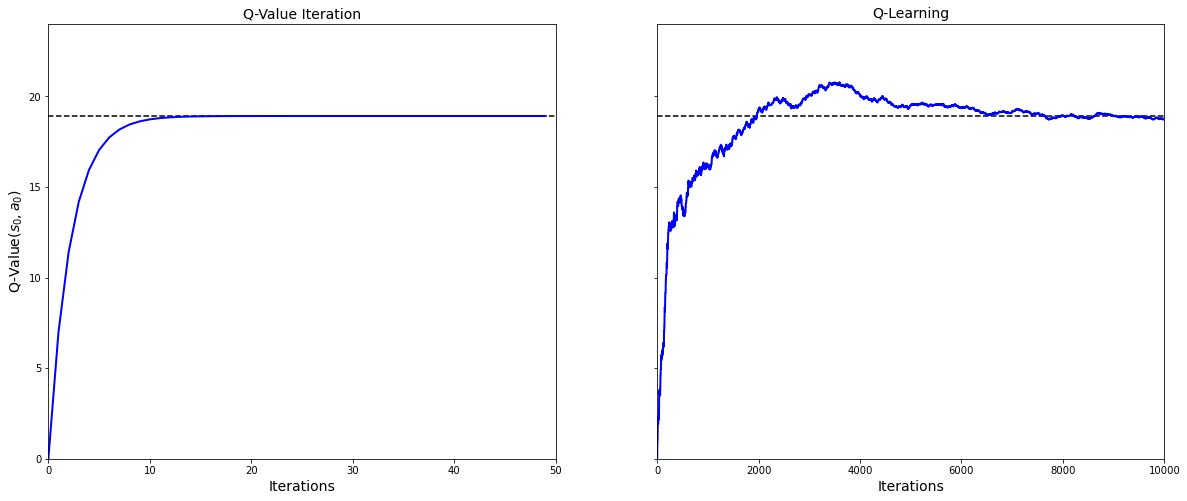

In [61]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

This algorithm will converge to the optimal Q-Values, but it will take many
iterations, and possibly quite a lot of hyperparameter tuning. As you can see in
the above figure, the Q-Value Iteration algorithm (left) converges very quickly, in
fewer than 20 iterations, while the Q-Learning algorithm (right) takes about
8,000 iterations to converge. Obviously, not knowing the transition probabilities
or the rewards makes finding the optimal policy significantly harder!

### Exploration vs Exploitation <br>

- A lot of the times we are picking a random action rather than just picking the action with the highest
score/probability. This approach lets the agent find the right balance between exploiting the actions that are known to work well and exploring new
actions(which might turn out to be better).   
Similar to an analogy where if we go to a restaurant for the first time, and all the dishes look equally appealing, we randomly pick one.
If it turns out to be good, you can increase the probability that you’ll order it next time, but you shouldn’t increase
that probability up to 100%, or else you will never try out the other dishes, some of which may be even better than the one you tried!
- Also note that in this particular environment, the past actions and observations
can safely be ignored, since each observation contains the environment’s full
state. If there were some hidden state, then we might need to consider past
actions and observations as well. For example, if the environment only revealed
the position of the cart but not its velocity, you would have to consider not only
the current observation but also the previous observation in order to estimate the
current velocity
- Or when the observations are noisy; in that case, you generally want to use the past few observations to estimate the most
likely current state. The CartPole problem is thus as simple as can be! The
observations are noise-free, and they contain the environment’s full state 
- In the case of Q-Learning, it can work only if the exploration policy explores the MDP
thoroughly enough. Although a purely random policy is guaranteed to eventually
visit every state and every transition many times, it may take an extremely long
time to do so. Therefore, a better option is to use the *ε*-greedy policy i.e at each step it acts randomly with probability ε, or greedily with
probability *1–ε* (i.e., choosing the action with the highest Q-Value)
- The advantage of the ε-greedy policy (compared to a completely random policy) is
that it will spend more and more time exploiting the interesting parts of the
environment, as the Q-Value estimates get better and better, while still spending
some time visiting unknown regions of the MDP

## Deep Q-Learning(DQN)<br>

- The main problem with Q-Learning is that it does not scale well to large (or even medium) MDPs with many states and actions
- The solution is to find a function $Q_{θ}(s, a)$ that approximates the Q-Value of any state-action pair (s, a) using a manageable number of parameters (given by the
parameter vector θ). This is called as *Approximate Q-Learning*
- A DNN used to estimate Q-Values is called a Deep Q-Network (DQN), and using a DQN for Approximate Q-Learning is  called *Deep Q-Learning*
- To train a DQN, we consider the approximate Q-Value computed by the DQN for a given state-action pair (s, a). 
 We want this approximate Q-Value to be as close as possible to the reward *r* that we actually observe after playing action *a* in state *s*, plus the discounted
value of playing optimally from then on
- To estimate this sum of future discounted rewards, we can simply execute the DQN on the next state s′ and for
all possible actions a′. We get an approximate future Q-Value for each possible
action. We then pick the highest (since we assume we will be playing optimally)
and discount it, and this gives us an estimate of the sum of future discounted
rewards
- By summing the reward *r* and the future discounted value estimate, we
get a target Q-Value **y(s, a)** for the state-action pair (s, a)

**Target Q-Value** :
$Q_{target}(s, a) = r + γ ⋅ max_{a'}Q_{θ}(s', a')$

With the target Q-Value, we can run a training step using any optimisation
algorithm. Specifically, we generally try to minimize the squared error between
the estimated Q-Value Q(s, a) and the target Q-Value.  
Let’s implement a DQN to solve the CartPole environment. 

In [5]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make("CartPole-v0")
input_shape = [4] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
keras.layers.Dense(32, activation="elu", input_shape=input_shape),
keras.layers.Dense(32, activation="elu"),
keras.layers.Dense(n_outputs)
])

To select an action using this DQN, we pick the action with the largest predicted
Q-Value. 
To ensure that the agent explores the environment, we will use an ε-
greedy policy (i.e., we will choose a random action with probability ε):

In [6]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(2)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

Instead of training the DQN based only on the latest experiences, we will store
all experiences in a replay buffer using a deque list(or replay memory), and we will sample a
random training batch from it at each training iteration. This helps reduce the
correlations between the experiences in a training batch, which tremendously
helps training.

In [7]:
from collections import deque
replay_memory = deque(maxlen=2000)

Each experience will be composed of five elements: a state, the action the agent
took, the resulting reward, the next state it reached, and finally a Boolean
indicating whether the episode ended at that point (done). We will need a small
function to sample a random batch of experiences from the replay buffer.

In [27]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states,actions,rewards,next_states,dones

Now we can create a function that will use the DQN to play one step, and record its experience in the replay memory

In [28]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_memory.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

Lastly, let's create a function that will sample some experiences from the replay memory and perform a training step.


In [38]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(lr=1e-2)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = (rewards +
                       (1 - dones) * discount_rate * max_next_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

Let’s go through this code:

- First we define some hyperparameters, and we create the optimizer and
the loss function
- Then we create the training_step() function. It starts by sampling a
batch of experiences, then it uses the DQN to predict the Q-Value for
each possible action in each experience’s next state. Since we assume
that the agent will be playing optimally, we only keep the maximum Q-Value
for each next state
- Next, we compute the target Q-Value for each experience’s state-action pair using the equation defined above
- Since the DQN will also output the Q Values for the other possible actions, and not just for the action that was
actually chosen by the agent. We need to mask out all the Q-Values
we do not need. 'The tf.one_hot()' function makes it easy to convert
an array of action indices into such a mask, using which we can zero out the unwanted Q values.
This gives us the Q_values tensor, containing one predicted Q-Value for
each experience in the batch.
- Then we compute the loss: it is the mean squared error between the
target and predicted Q-Values for the experienced state-action pairs.
- Finally, we perform a Gradient Descent step to minimize the loss with
regard to the model’s trainable variables.

In [39]:

env.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

rewards = [] 
best_score = 0

In [40]:
for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step) 
    if step >= best_score: 
        best_weights = model.get_weights()
        best_score = step
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="") # Not shown
    if episode > 50:
        training_step(batch_size)

model.set_weights(best_weights)

Episode: 51, Steps: 11, eps: 0.898WARNING:tensorflow:Layer dense is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Episode: 599, Steps: 122, eps: 0.010

- We run 600 episodes, each for a maximum of 200 steps. At each step, we first
compute the epsilon value for the ε-greedy policy: it will go from 1 down to 0.01, linearly, in a bit under 500 episodes
- Then we call the play_one_step() function, which will use the ε-greedy policy to pick an action, then execute it and
record the experience in the replay buffer. If the episode is done, we exit the
loop
- Finally, if we are past the 50th episode, we call the training_step()
function to train the model on one batch sampled from the replay buffer. The
reason we play 50 episodes without training is to give the replay buffer some
time to fill up (if we don’t wait enough, then there will not be enough diversity
in the replay buffer)

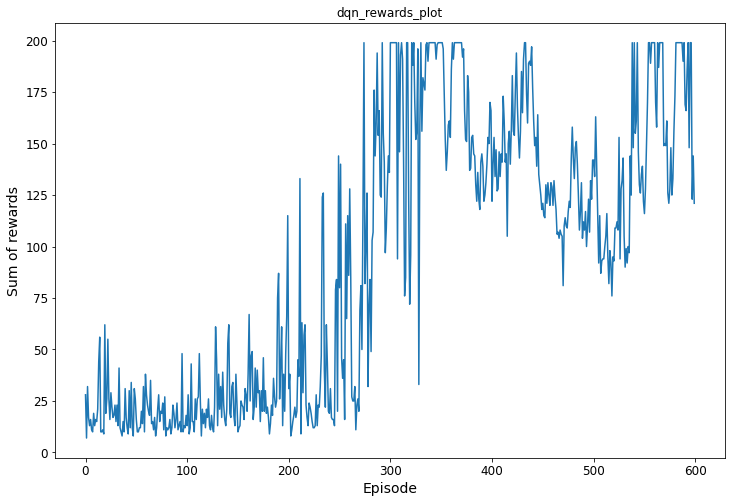

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.title("dqn_rewards_plot")
plt.show()

- As we can see, the algorithm made no apparent progress at all for almost 300
episodes (in part because ε was very high at the beginning), then its performance
suddenly skyrocketed up to 200 (which is the maximum possible performance in
this environment)
- The algorithm worked fine, and it actually ran much faster than the Policy Gradient algorithm but just a few
episodes later, it forgot everything it knew, and its performance dropped to
25! This is called catastrophic forgetting, and it is one of the big problems facing
virtually all RL algorithms: as the agent explores the environment, it updates its
policy, but what it learns in one part of the environment may break what it
learned earlier in other parts of the environment. 
- The experiences are quite correlated, and the learning environment keeps changing. 
If you increase the size of the replay buffer, the algorithm will be less subject to this problem. 
Reducing the learning rate may also help. But the truth is, Reinforcement Learning is hard: training is often unstable 
along with the huge sensitivity to the choice of hyperparameter values and random seeds 
- The loss is a poor indicator of the model’s performance. The loss might go down, yet the agent
might perform worse (e.g., this can happen when the agent gets stuck in one
small region of the environment, and the DQN starts overfitting this region).
Conversely, the loss could go up, yet the agent might perform better (e.g., if the
DQN was underestimating the Q-Values, and it starts correctly increasing its
predictions, the agent will likely perform better, getting more rewards, but the
loss might increase because the DQN also sets the targets, which will be larger
too)

In [57]:
env.seed(42)
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

# Additional terminology and DQN variants<br>

- The Q-Learning algorithm is called an off-policy algorithm because the policy
being trained is not necessarily the one being executed for
example, the exploration policy is completely
random, while the policy being trained will always choose the actions with the
highest Q-Values
- Conversely, the Policy Gradients algorithm is an on-policy
algorithm: It explores the world using the policy being trained. It is somewhat
surprising that Q-Learning is capable of learning the optimal policy by just
watching an agent act randomly
- A model-free algorithm is an algorithm that estimates the optimal policy without using or estimating the dynamics (transition and reward functions) of the environment. Whereas, a model-based algorithm is an algorithm that uses the transition function (and the reward function) in order to estimate the optimal policy.

Deep Q-Learning Variants

- Fixed Q-Value Targets
- Double DQN
- Prioritized Experience Replay
- Dueling DQN